In [1]:
from math import inf
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
xs = -2
xe = 2
ys = -2
ye = 2
xtics = 11
ytics = 11
num_p = 1001
x,y = np.meshgrid(np.linspace(xs, xe, num_p), np.linspace(ys, ye, num_p))

inf_comp = np.array(complex(inf, inf))
nanj = np.complex128(np.nan+(np.nan)*1j)

In [3]:
points = x + y*1j
counter = np.zeros_like(x)

In [4]:
points = points[::-1]

In [5]:
index = np.random.randint(num_p, size=2)
points[index[0], index[1]]

(0.14800000000000013+1.1920000000000002j)

In [6]:
def cmplx2index(num):
    r = np.real(num)
    i = np.imag(num)
    r_index = int(np.round((num_p-1)*(r-xs)/(xe-xs)))
    i_index = int(np.round((num_p-1)*(ye-i)/(ye-ys)))
    return [i_index, r_index]

In [7]:
print(index)
print(points[index[0], index[1]])
new_ind = cmplx2index(points[index[0], index[1]])
print(new_ind)
print(points[new_ind[0], new_ind[1]])

[202 537]
(0.14800000000000013+1.1920000000000002j)
[202, 537]
(0.14800000000000013+1.1920000000000002j)


In [8]:
def buddhabrot(c, inside_itrs=100):
    z = 0+0j
    index_array = []
    for i in range(inside_itrs):
        z = z**2 + c
        ind = cmplx2index(z)
        if not(0<ind[0]<=num_p-1 and 0<ind[1]<=num_p-1):
            break
        index_array.append(ind)
    if len(index_array) == inside_itrs:
        index_array  = []
    return index_array

In [9]:
points = points.ravel()

In [10]:
points = list(map(np.array, map(buddhabrot, points)))
points = filter(lambda x:x.size != 0, points)

In [11]:
points = filter(lambda x:x.size != 0, points)

In [12]:
points = np.vstack(points)
# points[241700].shape

<ipython-input-12-067e2ccf1a1d>:1: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  points = np.vstack(points)


In [13]:
points.shape

(2238870, 2)

In [14]:
for p in points:
    counter[p[0], p[1]] += 1

[]

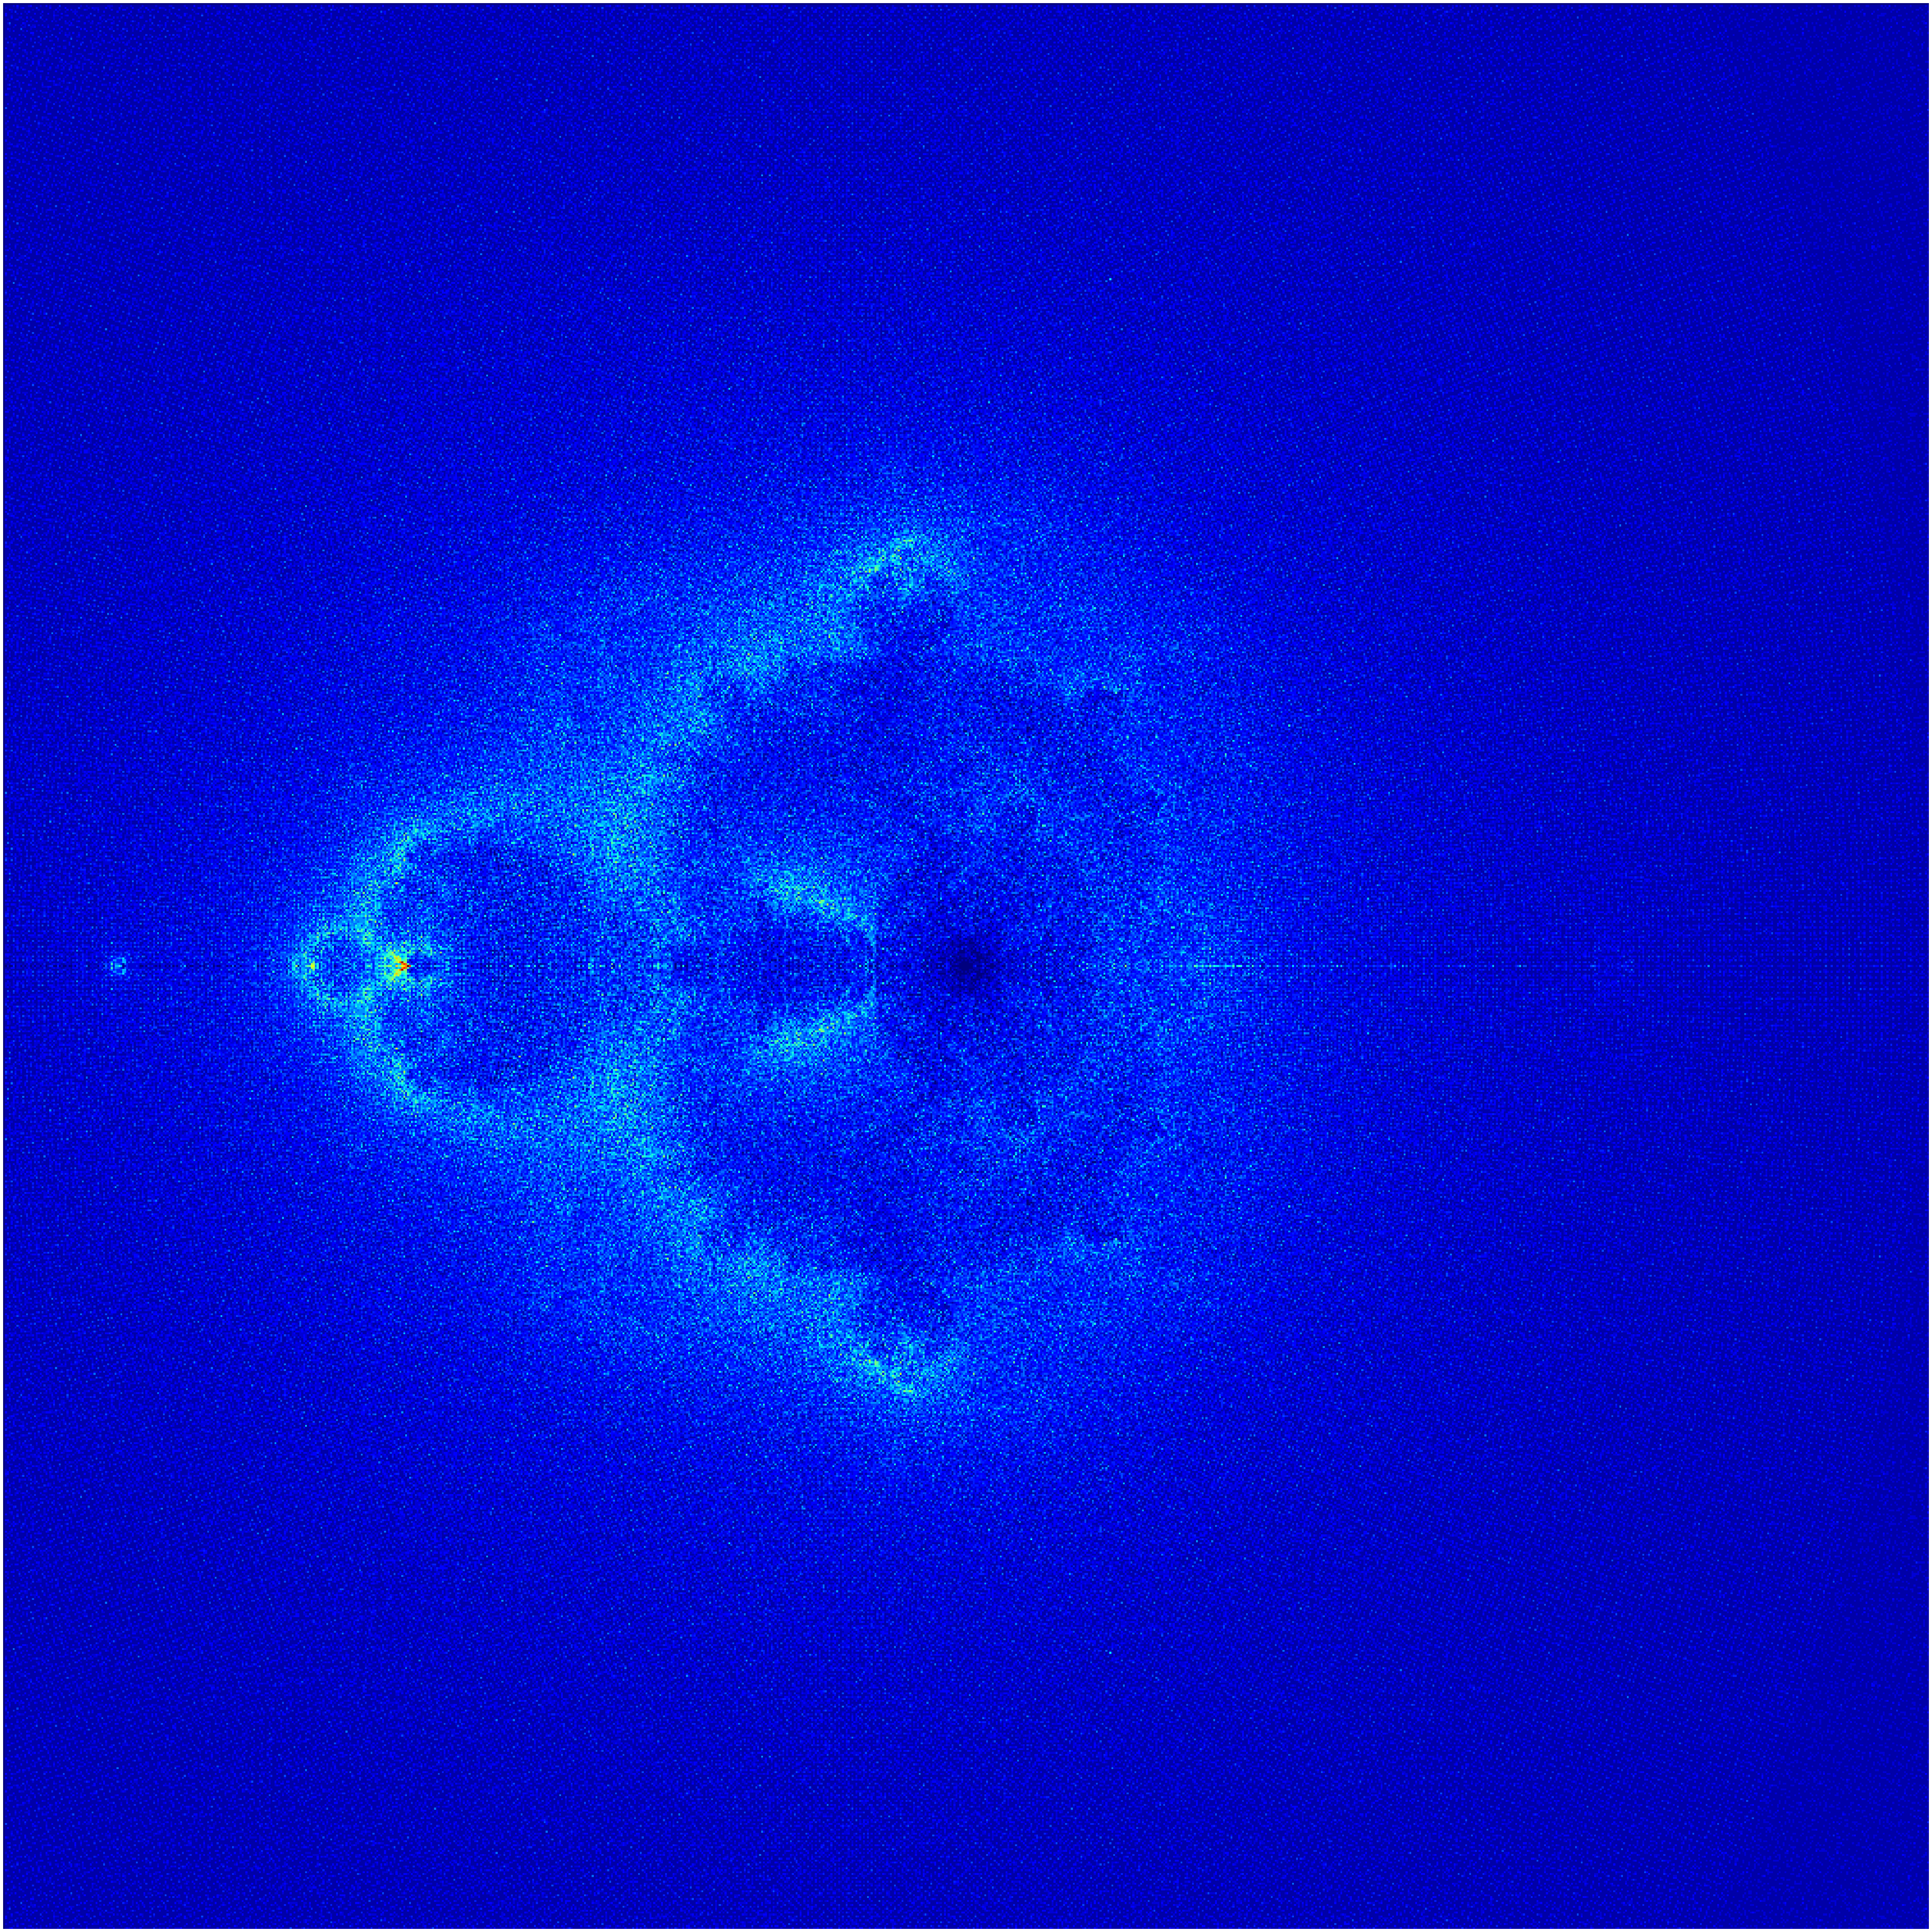

In [15]:
fig, ax = plt.subplots(figsize=(80, 80))
ax.imshow(counter,cmap=plt.cm.jet)
plt.axis("off")
plt.plot()

In [16]:
print(counter.max())
print(counter.min())

26.0
0.0


In [17]:
#use np.ix_ to accelerate it a little bit